# Lendo o arquivo e suas planilhas(sheets)

In [119]:
import pandas as pd

arquivo = 'dados.xlsx'

realizado = pd.read_excel(arquivo, sheet_name='realizado')
orcado = pd.read_excel(arquivo, sheet_name='orcado')

print(realizado)
orcado.head(15)


             Mes_1      Mes_2  Mes_3  Mes_4 Mes_5  Mes_6  Mes_7   Mes_8  \
NaN        janeiro  fevereiro  março  abril  maio  junho  julho  agosto   
Realizado      240        280    200    310   230    213    239     210   

              Mes_9   Mes_10    Mes_11    Mes_12  
NaN        setembro  outubro  novembro  dezembro  
Realizado       210      210       232       213  


,mês,orcado
0,janeiro,330
1,fevereiro,290
2,março,230
3,abril,321
4,maio,283
5,junho,291
6,julho,193
7,agosto,259
8,setembro,289
9,outubro,230


# Transformando os dados Realizados em coluna e adicionando a tabela

In [120]:
orcado['Realizado'] = realizado.loc['Realizado'].values

orcado['Realizado']

orcado.head(20)



,mês,orcado,Realizado
0,janeiro,330,240
1,fevereiro,290,280
2,março,230,200
3,abril,321,310
4,maio,283,230
5,junho,291,213
6,julho,193,239
7,agosto,259,210
8,setembro,289,210
9,outubro,230,210


# Adicionando a coluna Diferença salvando em csv

In [121]:
orcado['Diferença'] = orcado['orcado'].sub(orcado['Realizado'])
print(orcado)
orcado.to_csv('resultado.csv', index = None)


          mês  orcado Realizado Diferença
0     janeiro     330       240        90
1   fevereiro     290       280        10
2       março     230       200        30
3       abril     321       310        11
4        maio     283       230        53
5       junho     291       213        78
6       julho     193       239       -46
7      agosto     259       210        49
8    setembro     289       210        79
9     outubro     230       210        20
10   novembro     434       232       202
11   dezembro     421       213       208


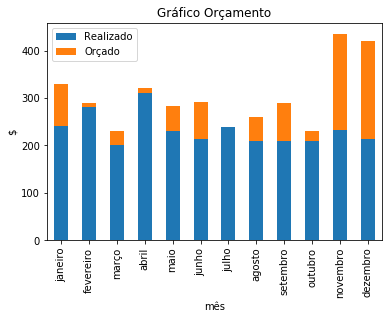

In [122]:
import matplotlib.pyplot as plt
import numpy as np

dados = pd.read_csv('resultado.csv', usecols=['mês', 'Realizado', 'Diferença',])


x= dados[['mês','Realizado','Diferença']]
y= x.set_index('mês')
z=y.groupby('mês', sort = False).mean()



z.plot.bar(stacked=True)

plt.ylabel('$')
plt.title('Gráfico Orçamento')
plt.legend(('Realizado', 'Orçado'))
plt.ylim(0)

plt.savefig('resultado.png')
plt.show()

